<h2>Common Tasks in Data Preprocessing</h2>

<h3>
    IT6773 <br>
    Linh Le <br>
    Department of Information Technology <br>
    Kennesaw State University <br>
</h3>

<h3> Concept Review </h3>

We will first review some important concepts in data analytics. Below is an example of a dataset. Let's assume our task is to predict the employee's productivity based on other given information.

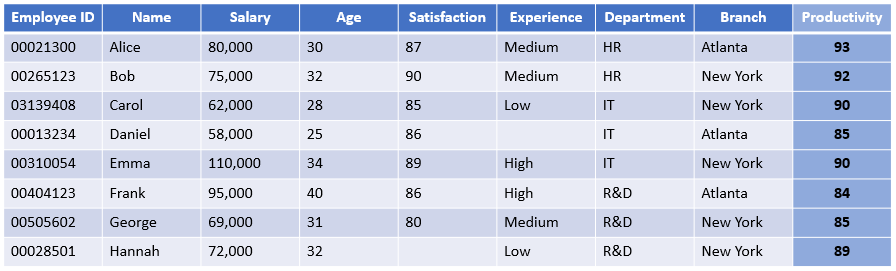

- <b>Dataset</b>: the collection of data. In this example, the whole data table.

- <b>Data instance</b>: one object in the dataset. Also referred to as <b>row</b> (mostly in 2D data), <b>data point</b>, <b>instance</b>, <b>record</b> (in database). In this example, each employee is one instance.

- <b>Attribute</b>: one characteristic of the data. Also referred to as <b>column</b> (mostly in 2D data), <b>variable</b>. In this example, Employee ID, Name, Salary, Experience... are attributes, or columns.

    - <b>Target</b>: The column that is the goal of the analysis, usually what we want to predict. In this case, Productivity is the target. Also called <b>target variable</b>, <b>dependent variable</b>. Recall, we <b>only</b> have a target in supervised learning task.

    - <b>Input</b>, or <b>input variables, input columns</b>: columns that we give a model to perform the given task that are not the target. Note that not all columns in a dataset are useful for a model. For example, in this case, ID and Name are not useful to predict employee's productivity. However, in analysis where differences among people are emphasize, ID can be a good input.
    
    - <b>Numeric column</b>: columns of which values are numbers.
    
    - <b>Class column</b>: columns of which values are not numeric. They usually are string values, but in certain cases still look like numbers. The difference from a true numeric column is that math operations/functions applied on numeric columns make senses. For example, Salary is a numeric column, mean/average of salary makes sense. If we convert Department to number (e.g. HR = 1, IT = 2, R&D = 3), it is still a class column, because mean of department codes is not meaningful.
    
        - <b>Ordinal class</b>: classes of which values have <b>inherent order</b>. These columns can be convert to meaningful number. For example, Experience values of Low - Medium - High can be converted to 1 - 2 - 3, because Low < Medium makes sense, and a mean experience of 1.5 suggests more employees are in low and medium experiences.
        
        - <b>Nominal class</b>: classes of which values have <b>no inherent order</b>. These columns cannot be convert to meaningful numbers. For example, Department and Branch.
        
        - <b>Binary class</b>: classes which have exactly two columns. They are the easiest to deal with. They can be converted to 0 an 1 without worrying about meaning of the numeric values.
        
- <b>Distribution</b>: how values of a column are distributed. In a numeric columns, we may look at the mean, standard deviation, shape of histograms... In a class column, we usually look at the frequency of values.

- <b>Missing value</b>: fields that have <b>no meaningful values</b> compared to other fields in the same column. Note that depend on the data provider, missing values <b>may or may not</b> be an empty value in the data. For example, they can be a "?" instead of an empty string. Certain companies code their missing value with a number, -1, or 99. We do need to refer to the data documentation.    

<h3> Common Preprocessing Tasks </h3>

In the last module, we learned about using Pandas for data loading, preprocessing, and preliminary analysis. In practice, it is fairly rare for us to get very "clean" data to work with. There are some common tasks that we may have to do before our data is ready for modeling. They are
- Splitting train/test data. This is mainly to deal with the overfitting problem.
- Standardizing numeric attributes. Numeric attributes may have different ranges, some from 0 to 1, some from $-\infty$ to $+\infty$. Not all models are good at dealing with very different ranges in attributes. In general, we will transform them to have similar ranges of values with standardization.
- Handling missing values. Data goes missing all the times. Rows/columns with missing data clearly cannot be used in models (except for models like tree-based ones), and you have to deal with them somehow.
- Encoding class columns. Very few models can directly work with class values. We always have to convert them to numerical representations.

<h3> The Credit Approval Data </h3>

We will use the credit rating data in this module. This is a quite interesting dataset, it has both numeric attributes and class attributes with few to many unique values. It also has missing data that we will need to deal with. The file is <b>crx.data</b>, available on D2L.

In [22]:
import pandas as pd

crx = pd.read_csv('crx.data',header=None) #the data doesn't come with header names, we don't need them anyway :)

print(crx.shape)                          #the shape() function gives the data size (rows,columns)
crx.head()                                #the head() function display a few first rows in the data

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


Note: the last column (15) is the target variable in this data. It represents if a case is approved (+) or not (-).

Let's use describe() to look at the numeric columns. We can see column 1 and 13 have some missing values (their count is less than total number of rows - 690). The ranges of values among these columns are also very different.

In [4]:
crx.describe()

,1,2,7,10,13,14
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Now let look at the class columns. There are a few columns with quite many unique values.

In [15]:
#to select all column with a certain type
#we can use DataFrame.select_dtypes(type)
#when load the data, if a column is not numeric
#pandas will load it as 'object'

for column in crx.select_dtypes(object).columns: #the columns attribute gives a list of column names in the DataFrame
    print('------' + str(column) + '------')     #I'm also printing out the column names for readability
    print(crx[column].value_counts())            #recall, we use value_counts() to obtain counts of unique values in a column
    print()                                      #print an emtpy line to separte different column

------0------
b    468
a    210
Name: 0, dtype: int64

------3------
u    519
y    163
l      2
Name: 3, dtype: int64

------4------
g     519
p     163
gg      2
Name: 4, dtype: int64

------5------
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64

------6------
v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: 6, dtype: int64

------8------
t    361
f    329
Name: 8, dtype: int64

------9------
f    395
t    295
Name: 9, dtype: int64

------11------
f    374
t    316
Name: 11, dtype: int64

------12------
g    625
s     57
p      8
Name: 12, dtype: int64

------15------
-    383
+    307
Name: 15, dtype: int64



<h3> The Overfitting Problem and Train/Test Splitting</h3>

A machine learning model is <b>trained</b> from data to solve a given task 
- A very common problem in machine learning and data analytics is that a model can be trained "too much" on a dataset and adapt poorly to new data. This is problem is referred to as the <b>overfitting</b> problem. Formally, it means that a model works very well in the data on which it was trained, but performs <b>much worse</b> on newly given data. 

For example, assume we are trying to predict a numeric Target using a numeric Feature, and come up with two models as below. - - The dots are data instances
- To the right side of the dash line is the <b>training data</b> - data on which we train the model 
- To the left side of the dash line is new data 
- The curves represent predictions made by each model

Which model do you prefer?

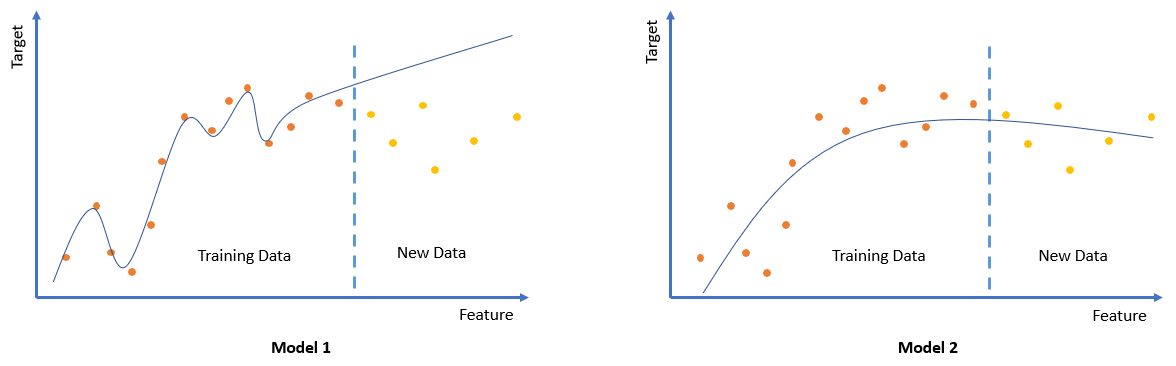

- Model 1 certainly makes very accurate prediction in the training data, however very poorly in the new data. 
- Model 2 performs well enough in both training and new data. 

In this case, model 1 is overfitting the training data, and model 2 is better to use (because we always want good performances in new data).

To avoid overfitting, we need to measure how models are performing in its training data and in new data. 
- Because we usually cannot get new data during analysis, we split data into at least two sets which are called <b>training data</b> and <b>testing data</b>
    - Training data is used to train our models
    - Testing data acts as new data coming in, is used to test models' performances on data they have <b>never seen before</b>.
    
Note that the <b>never seen before</b> criterion is highly important. All of your analysis <b>must</b> be done in the training data (from preprocessing, preliminary analysis, to model selection, finetuning...). Testing data is <b>only used</b> at <b>the end</b> where all models have been finalized to compare their performances on new data.

<h4> Splitting Data with SKLearn </h4>

SKLearn provides several methods for us to split data into training and testing sets

1. Random Split

Data instances are randomly selected and put into the training set and testing set. You can choose the ratio of training/testing like 50:50, 75:25, 80:20... If the data is big enough, you can choose 50:50, otherwise, 75:25 or 80:20, because we still want to have as much training data as possible.

In SKLearn, we use <b>sklearn.model_selection.ShuffleSplit()</b>

<h5>Random Split with SKLearn</h5>

In [17]:
###split into 80% training 20% testing
from sklearn.model_selection import ShuffleSplit

#Parameters you need to provide
#n_splits: how many times you want to split. Let's just set it to 1
#test_size: size of the testing data. If we want 25% data as testing, set this to 0.25
#random_state: random seed used to split data. Set this if you want to obtain the exact split later. Otherwise it's optional

split = ShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

#the below for loop can be used to obtain train_set and test_set as new DataFrame
#you can reuse the code, just need to change the data name (crx to some other name you want)
#and train_set, test_set if you would like other train/test names
for train_index, test_index in split.split(crx):
    train_set = crx.loc[train_index]
    test_set = crx.loc[test_index]
    
#let check the sizes of train_set and test_set
print(train_set.shape, test_set.shape) #DataFrame.shape returns (number of rows, number of columns)

(517, 16) (173, 16)


Now let's look at the data distributions in training and testing set. First, for distributions of numeric columns, we can use describe(). 

You can see the attributes' distributions in training and testing set are "similar enough": besides min and max, the other statistics are fairly close. 

In [23]:
train_set.describe()

,1,2,7,10,13,14
count,509.000000,517.000000,517.000000,517.000000,505.000000,517.000000
mean,31.630354,4.666905,2.060445,2.441006,178.546535,949.705996
std,11.940539,4.814152,2.968543,4.941019,166.245642,4925.227081
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.750000,1.085000,0.165000,0.000000,73.000000,0.000000
50%,28.580000,2.835000,1.000000,0.000000,160.000000,7.000000
75%,37.750000,7.000000,2.500000,3.000000,272.000000,400.000000
max,80.250000,26.335000,20.000000,67.000000,2000.000000,100000.000000


In [21]:
test_set.describe()

,1,2,7,10,13,14
count,169.000000,173.000000,173.000000,173.000000,172.000000,173.000000
mean,31.380888,5.033121,2.710405,2.277457,200.069767,1219.641618
std,12.043524,5.444564,4.255185,4.633474,193.948675,5992.495151
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.080000,0.790000,0.165000,0.000000,80.000000,0.000000
50%,27.830000,2.500000,1.085000,0.000000,160.000000,0.000000
75%,38.920000,8.460000,3.000000,3.000000,280.000000,367.000000
max,69.500000,28.000000,28.500000,40.000000,1160.000000,51100.000000


For the class attributes, we can use barcharts. A note is that plot.bar() will not show the plots in a loop. We need to manually force the plot to be showed. we can do this by importing pyplot from matplotlib and call pyplot.show() at the end of each loop.

------0------


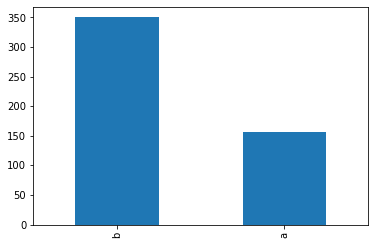

------3------


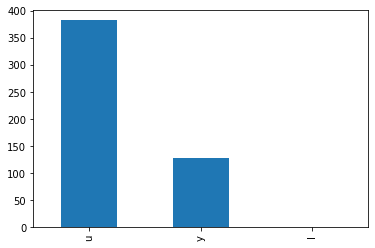

------4------


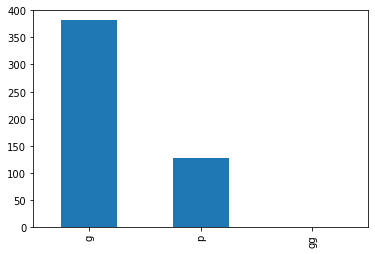

------5------


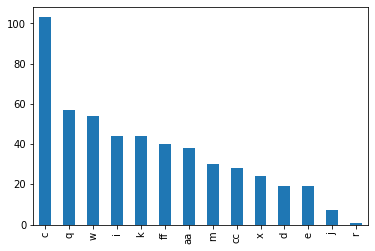

------6------


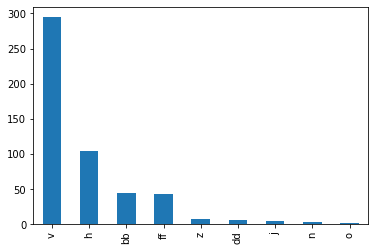

------8------


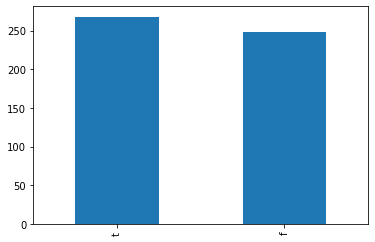

------9------


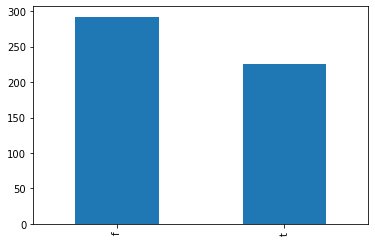

------11------


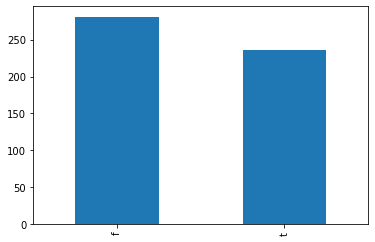

------12------


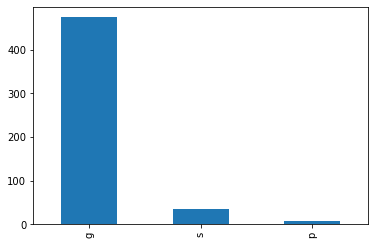

------15------


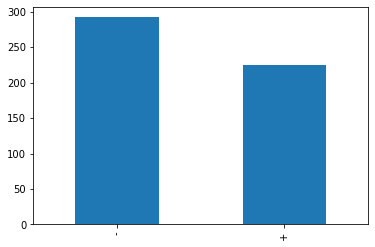

In [29]:
from matplotlib import pyplot as plt  #import matplotlib.pyplot and alias it as plt

for column in train_set.select_dtypes(object).columns: 
    print('------' + str(column) + '------')
    train_set[column].value_counts().plot.bar()
    plt.show()

------0------


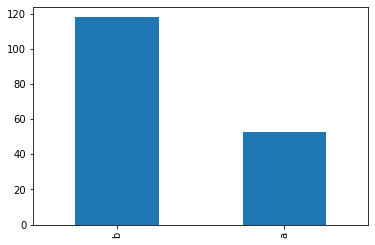

------3------


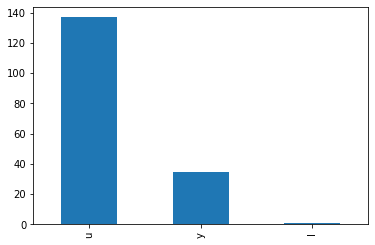

------4------


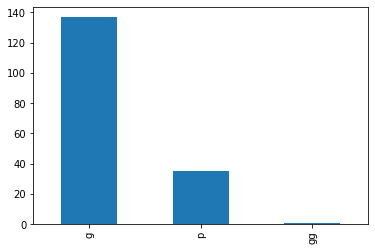

------5------


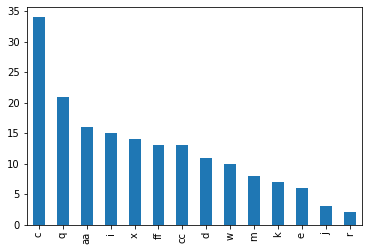

------6------


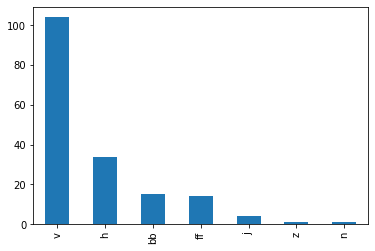

------8------


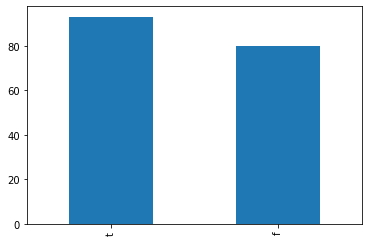

------9------


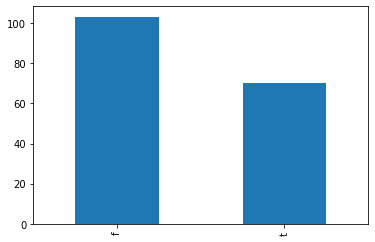

------11------


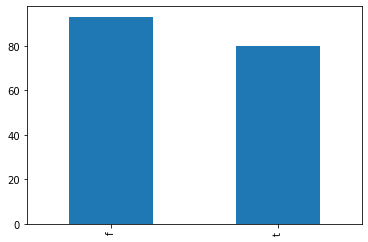

------12------


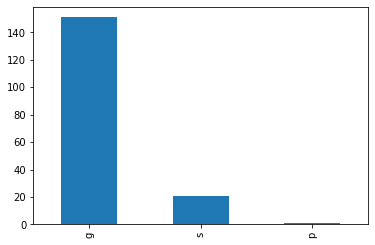

------15------


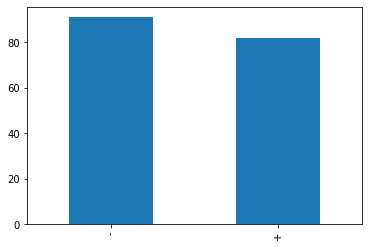

In [30]:
for column in test_set.select_dtypes(object).columns: 
    print('------' + str(column) + '------')
    test_set[column].value_counts().plot.bar()
    plt.show()

Some analysts may not think random split did a good job on keeping the distributions of the target similar in training and testing set. In such cases, we may want to use a <b>stratified</b> split.

<h5>Stratified Split with SKLearn</h5>

Stratified splitting allows us to split the data while preserving the distribution of an attribute (usually the target). In SKLearn, we use <b>sklearn.model_selection.StratifiedShuffleSplit</b>

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

#the parameters for this split is similar like before
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

#now we need to provide a stratified column, the target is column 15, so let's use that
#similar to before, you can reuse this code for stratified split
#you just need to change the data and the stratified column
for train_index, test_index in split.split(crx, crx[15]):
    strat_train_set = crx.loc[train_index]
    strat_test_set = crx.loc[test_index]

Let's see the barcharts again. Now the distributions of class are exactly the same in both training and testing data.

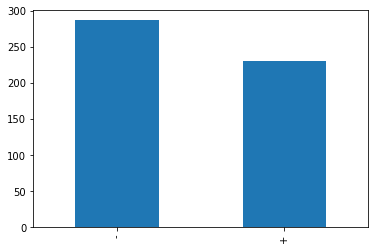

In [32]:
ax1 = strat_train_set[15].value_counts().plot.bar()

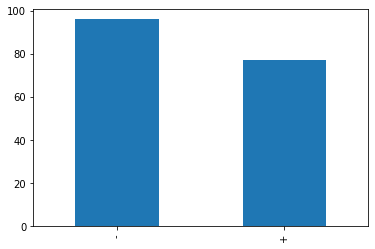

In [33]:
ax2 = strat_test_set[15].value_counts().plot.bar()

We only need stratified split for class target. For numeric target, we can stick to a random split.

A final note, random split is often enough, especially when the data size is large. Slight differences in training and testing data don't impact the models much. In special cases (mostly when the data size is small and/or you have rare values in certain attributes that need preserved), stratified split can be used. 

We don't often check and compare the distributions of split data. I'm just showing them here so you can see they are indeed similar.

<h3>Standardizing Numeric Columns</h3>

As discussed, some models deal with large differences in ranges of values of attributes poorly. We usually want all numeric attributes to have similar ranges. A of doing this is <b>standardization</b>. In standardization, we transform the values in the column so that they has mean of 0 and standard deviation of 1

In SKLearn, we can use <b>sklearn.preprocessing.StandardScaler</b>. The <b>fit_transform()</b> function will do everything in one step. 

One thing to note is, StandardScaler cannot work on class attributes, and will report errors if your give it a DataFrame that has class attributes. We need to filter out such columns, which can be done with <b>DataFrame.select_dtypes('number')</b>

In [43]:
from sklearn.preprocessing import StandardScaler

train_set_stdz = StandardScaler().fit_transform(train_set.select_dtypes('number'))

Another thing to note is that the normalized version of the DataFrame is no longer a DataFrame but a numpy array. This doesn't matter much, we want data as numpy arrays when modeling anyway. It just means we won't be able to use functions of DataFrame any more. We can temporary convert the standardized data back to DataFrame to use describe(). As you can see, now all attributes have more similar ranges of values

In [46]:
train_set.describe()

,1,2,7,10,13,14
count,509.000000,517.000000,517.000000,517.000000,505.000000,517.000000
mean,31.630354,4.666905,2.060445,2.441006,178.546535,949.705996
std,11.940539,4.814152,2.968543,4.941019,166.245642,4925.227081
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.750000,1.085000,0.165000,0.000000,73.000000,0.000000
50%,28.580000,2.835000,1.000000,0.000000,160.000000,7.000000
75%,37.750000,7.000000,2.500000,3.000000,272.000000,400.000000
max,80.250000,26.335000,20.000000,67.000000,2000.000000,100000.000000


In [45]:
pd.DataFrame(train_set_stdz).describe()

,0,1,2,3,4,5
count,5.090000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.050000e+02,5.170000e+02
mean,5.932822e-17,5.153840e-17,-1.717947e-17,-2.061536e-17,-9.321476e-17,-6.871787e-18
std,1.000984e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000992e+00,1.000969e+00
min,-1.498923e+00,-9.703527e-01,-6.947651e-01,-4.945073e-01,-1.075057e+00,-1.930116e-01
25%,-7.444463e-01,-7.447572e-01,-6.391285e-01,-4.945073e-01,-6.355125e-01,-1.930116e-01
50%,-2.557133e-01,-3.808936e-01,-3.575733e-01,-4.945073e-01,-1.116716e-01,-1.915889e-01
75%,5.130142e-01,4.851019e-01,1.482144e-01,1.132430e-01,5.626982e-01,-1.117184e-01
max,4.075819e+00,4.505276e+00,6.049071e+00,1.307858e+01,1.096726e+01,2.013029e+01


<h3>Dealing with Missing Data</h3>

As mentioned, rows with missing values cannot be used in most models and need to be handled. There are a few treatments for missing values.

<h4>1. Dropping Rows with Missing Values</h4>

Not the best way to handle missing data, but also not the worst. This approach is rather frowned upon in statistics, but it's okay for us because we are using machine learning :)

Dropping missing values is simple with Pandas. We can use <b>DataFrame.dropna()</b>. Notice how the number of rows drops from 690 to 653 afterward. dropna() won't change the original DataFrame, so we need to store the new DataFrame in a new variable.

In [49]:
crx_wo_na = crx.dropna()
crx_wo_na

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


<h4>2. Imputation</h4>

Dropping missing data has certain problems

1. Losing information. We have to drop a whole row even if it only has one field missing. Furthermore, in many cases, missing data can be a strong pattern for analysis.
2. Not enough data for modeling. In many cases, the data can be very dirty, and dropping all missing may result in a much smaller dataset.

A preferred way in such cases is to <b>impute</b> the missing data. This means to replace missing values with a certain value. 

If the column with missing value is a class column, we can simply replace the missing values with a missing class, for example, 'missing'. This can be done quite simple with <b>DataFrame.fillna()</b>. Similar to dropna(), we need to save the new data in a new variable. These new 'missing' values will be dealt with in the next task.

In [23]:
#first, we duplicate the original data
#so we can impute it in two stages
#first, imputing class columns
#and, imputing numeric columns
crx_imputed = crx

crx_imputed.loc[:, crx.dtypes == object] = crx.select_dtypes(object).fillna('missing')

#now look at the class columns after imputation
for column in crx_imputed.select_dtypes(object).columns:
    print('------' + str(column) + '------')    
    print(crx_imputed[column].value_counts())           
    print()                                     

------0------
b          468
a          210
missing     12
Name: 0, dtype: int64

------3------
u          519
y          163
missing      6
l            2
Name: 3, dtype: int64

------4------
g          519
p          163
missing      6
gg           2
Name: 4, dtype: int64

------5------
c          137
q           78
w           64
i           59
aa          54
ff          53
k           51
cc          41
x           38
m           38
d           30
e           25
j           10
missing      9
r            3
Name: 5, dtype: int64

------6------
v          399
h          138
bb          59
ff          57
missing      9
j            8
z            8
dd           6
n            4
o            2
Name: 6, dtype: int64

------8------
t    361
f    329
Name: 8, dtype: int64

------9------
f    395
t    295
Name: 9, dtype: int64

------11------
f    374
t    316
Name: 11, dtype: int64

------12------
g    625
s     57
p      8
Name: 12, dtype: int64

------15------
-    383
+    307
Name: 15,

When the column being imputed is numeric, a very common strategy is to use the median of the column as the replacing value. We will still use fillna()

In [28]:
crx_imputed.loc[:, crx.dtypes == np.number] = crx.select_dtypes('number').fillna(crx.median())

#and after imputation
crx_imputed.describe()

,1,2,7,10,13,14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


A note when imputing missing values in numeric columns is that no matter which approach you use, the replacing data is still "fake" data. They may affect your models when their proportion is large. In general, if the column has more than 25-30% missing values, then you are probably better off dropping it.

This is less troublesome in class columns, the new 'missing' value may not contribute to the models but won't bias them.

<h3>Encoding Class Attributes</h3>

Very few models can directly use class attributes. Very often, we need to find a way to convert class attributes to numeric ones. We will discuss a few in this module.

<h4>One Hot Encoding</h4>

In this method, we create a new <b>binary</b> column for <b>each distinct value</b> in the class column. This means, a class column that has three values, for example, (low, medium, high), will result in three new binary columns. Here, binary means the columns only have two distinct value, 0 and 1. The value is 1 when the row belong to the corresponding class of the column, and 0 otherwise. For example

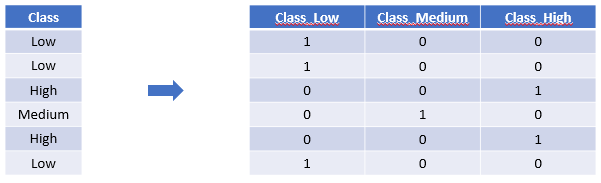

As you can see, rows that have class of low have the new attribute class_low of 1, and the rest being 0. Similarly for rows in medium class, and high class.

In SKLearn, we can use <b>sklearn.preprocessing.OneHotEncoder</b>. Similar to StandardScaler, this is done quite easily with <b>fit_transform()</b>. This transformation also outputs numpy array instead of DataFrame. Again, this doesn't matter much.

In [36]:
from sklearn.preprocessing import OneHotEncoder

#notice the double brackets in iris[['class']] 
#This is because fit_transform only takes 2D data, 
#and iris['class'] is a pandas series which is an 1D object

#another note, fit_transform() returns a sparse array
#so we need to use toarray() to obtain a regular numpy array
onehot = OneHotEncoder(sparse=False)
crx_class_code = onehot.fit_transform(crx_imputed.select_dtypes(object))

print(crx_class_code)

[[0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]]


<h4>Target Encoding (Optional Material)</h4>

One hot encoding is effective only if the number of unique values in the class column is small. If you have a class column that stores the, for example, states in the US - which means over 50 unique values, this approach will result in over 50 new columns in the data. Furthermore, data in these columns are very sparse (which mean most values are 0) and we don't usually like that. In cases like this, we prefer the <b>Target Encoder</b> approach.

<b>Target Encoder</b> requires the data to have a target. Since we will be working with supervised learning in this course, this is not a problem. In brief, Target Encoding  relaces the classes' values with the expected values of target.

We will use the package <b>category_encoders</b> for this transform. You can install the package with

<b>pip install category_encoders</b>

or if you are using Linux/Mac

<b>sudo pip install category_encoders</b>

After installing the module, we can use <b>TargetEncoder</b>

In [51]:
from category_encoders import TargetEncoder

targetencode = TargetEncoder()

#TargetEncoder only works with numeric values, so we need to convert the target first
#fortunately, the target in this case is binary (i.e. has exactly two unique values '+' and '-')
#so converting is simple
binary_target = crx[15]=='+' #a simple comparison will return 1 where the values is '+', and 0 where it is '-'

#now we can use the encoder
crx_coded = targetencode.fit_transform(crx_imputed, y=binary_target)

crx_coded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.440171,30.83,0.000,0.493256,0.493256,0.515625,0.423559,1.25,0.786704,0.708475,1,0.430481,0.459200,202.0,0,1.0
1,0.466667,58.67,4.460,0.493256,0.493256,0.653846,0.630435,3.04,0.786704,0.708475,6,0.430481,0.459200,43.0,560,1.0
2,0.466667,24.50,0.500,0.493256,0.493256,0.653846,0.630435,1.50,0.786704,0.248101,0,0.430481,0.459200,280.0,824,1.0
3,0.440171,27.83,1.540,0.493256,0.493256,0.515625,0.423559,3.75,0.786704,0.708475,5,0.462025,0.459200,100.0,3,1.0
4,0.440171,20.17,5.625,0.493256,0.493256,0.515625,0.423559,1.71,0.786704,0.248101,0,0.430481,0.263158,120.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.440171,21.08,10.085,0.276074,0.276074,0.560000,0.630435,1.25,0.069909,0.248101,0,0.430481,0.459200,260.0,0,0.0
686,0.466667,22.67,0.750,0.493256,0.493256,0.452555,0.423559,2.00,0.069909,0.708475,2,0.462025,0.459200,200.0,394,0.0
687,0.466667,25.25,13.500,0.276074,0.276074,0.132075,0.140351,2.00,0.069909,0.708475,1,0.462025,0.459200,200.0,1,0.0
688,0.440171,17.92,0.205,0.493256,0.493256,0.351852,0.423559,0.04,0.069909,0.248101,0,0.430481,0.459200,280.0,750,0.0


<b>Note</b>: at the moment, the TargetEncoder only works for numeric and binary columns. We can write more codes to use this encoder on data with multi-label target, but it may be too complicated in this course. I may provide more materials on this if you are interested. For now, you can stick to OneHotEncoder for simplicity.